In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset


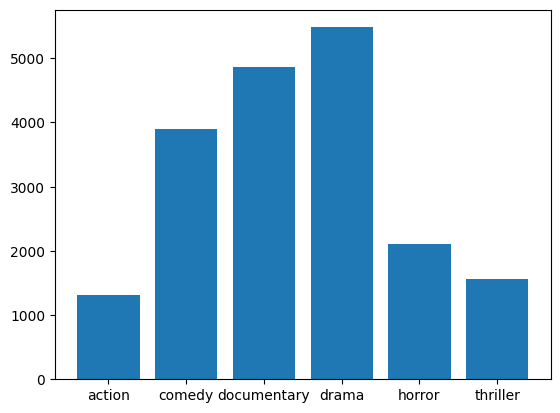

In [73]:
# Part 1.a
genres = ["action", "comedy", "documentary", "drama", "horror", "thriller"]
genres_count = {
    "action": 0,
    "comedy": 0,
    "documentary": 0,
    "drama": 0,
    "horror": 0,
    "thriller": 0
}
label_map = {
    "action": 0,
    "comedy": 1,
    "documentary": 2,
    "drama": 3,
    "horror": 4,
    "thriller": 5
}
labels = []

train_file = open('data/train.txt', 'r')
while True:
    line = train_file.readline()
    if not line:
        break
    
    genre = line.split(" ::: ")[1]
    genres_count[genre] += 1
    labels.append(label_map[genre])


plt.bar(genres, genres_count.values())

# validation labels
validation_labels = []

validate_file = open('data/validate.txt', 'r')
while True:
    line = validate_file.readline()
    if not line:
        break
    
    genre = line.split(" ::: ")[1]
    validation_labels.append(label_map[genre])



In [74]:
# 1.2
train_df = pd.read_csv('data/train.csv', header=0).drop(columns=['f_1'])

feature_tensor = torch.tensor(train_df.drop(columns=['genre']).values)
label_tensor = torch.tensor(labels, dtype=torch.long)

print(feature_tensor.shape)
print(label_tensor.shape)

dataset = TensorDataset(feature_tensor, label_tensor)
dataloader = DataLoader(dataset, batch_size=64)

validation_df = pd.read_csv('data/validate.csv', header=0).drop(columns=['f_1'])

v_feature_tensor = torch.tensor(validation_df.drop(columns=['genre']).values)
v_label_tensor = torch.tensor(validation_labels, dtype=torch.long)



torch.Size([19224, 299])
torch.Size([19224])


In [82]:
# 1.3
class SimpleNeuralNet(nn.Module):
    def __init__(self, num_layers, num_nodes):
        super().__init__()
        layers = []

        prev_size = 299
        for _ in range(num_layers):
            layers.append(nn.Linear(prev_size, num_nodes, dtype=torch.float64))
            prev_size = num_nodes

        layers.append(nn.Linear(prev_size, 6, dtype=torch.float64)) # Output layer

        self.stack = nn.Sequential(*layers)

    def forward(self, x):
        logits = self.stack(x)
        return logits
    
    def train(self, dataloader, learning_rate, num_epochs):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        for _ in range(num_epochs):
            running_loss = 0
            for inputs, label in dataloader:
                output = self(inputs)
                loss = criterion(output, label)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            # report train and validation loss


    
# part i)
model = SimpleNeuralNet(1, 32)
    
model.train(dataloader, 0.001, 100)

criterion = nn.CrossEntropyLoss()
validate_output = model(v_feature_tensor)
print(validate_output[0])
val_loss = criterion(validate_output, v_label_tensor)
print(val_loss)
    


tensor([15171.0127, 60543.2906, 31513.3595, 43447.9159, 28535.4644, 46679.6774],
       dtype=torch.float64, grad_fn=<SelectBackward0>)
tensor(2826.6272, dtype=torch.float64, grad_fn=<NllLossBackward0>)
